# <center>`Mathematical Background`</center>

# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [18]:
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

# Probability

In [19]:
np.random.randint(1,7)  # roll of a die

4

In [20]:
few_rolls  = np.random.randint(1,7,size=10)
many_rolls = np.random.randint(1,7,size=1000)

In [21]:
bins = np.arange(.5, 7.5)
few_counts = np.histogram(few_rolls, bins=bins)[0]
many_counts = np.histogram(many_rolls, bins=bins)[0]

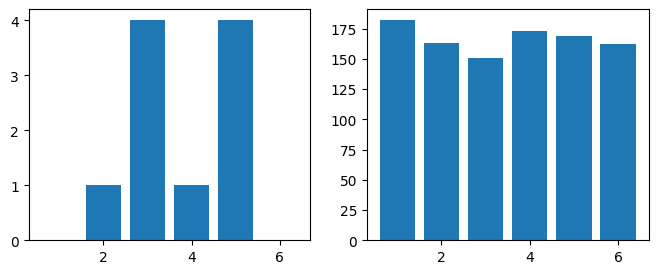

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3))
ax1.bar(np.arange(1,7), few_counts)
ax2.bar(np.arange(1,7), many_counts);

# Distributions

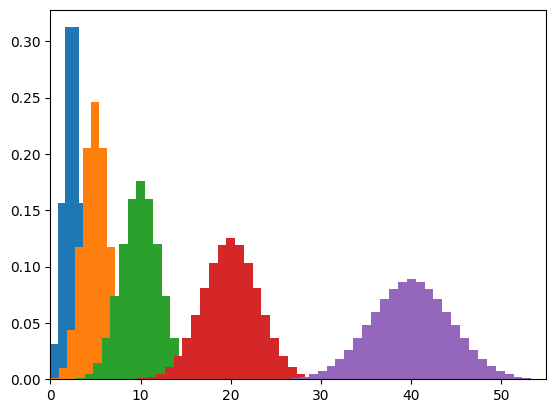

In [23]:
import scipy.stats as ss
b = ss.distributions.binom
for flips in [5, 10, 20, 40, 80]:
    success = np.arange(flips)
    our_dists = b.pmf(success, flips, .5)
    plt.hist(success, flips, weights=our_dists)
plt.xlim(0,55);

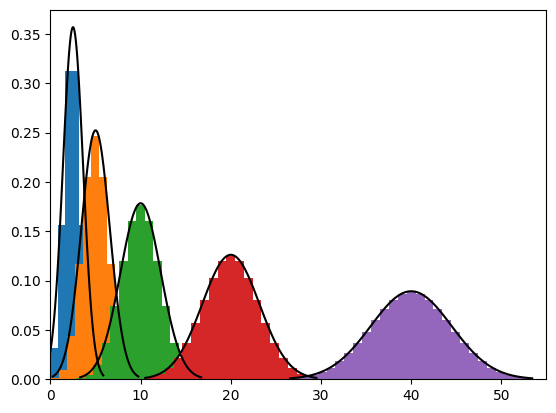

In [24]:
import scipy.stats as ss
b = ss.distributions.binom
n = ss.distributions.norm

for flips in [5, 10, 20, 40, 80]:
    success = np.arange(flips)
    our_dists = b.pmf(success, flips, .5)
    plt.hist(success, flips, weights=our_dists)
    
    mu      = flips * .5
    std_dev = np.sqrt(flips * .5 * (1-.5))
    
    norm_x = np.linspace(mu-3*std_dev, mu+3*std_dev, 100)
    norm_y = n.pdf(norm_x, mu, std_dev)
    plt.plot(norm_x, norm_y, 'k')
    
plt.xlim(0,55);

# Linear Combinations

In [25]:
(2 * 12.50) + (12 * .5) + (3 * 1.75)

36.25

In [26]:
2 + 12 + 3

17

In [27]:
quantity = [2, 12, 3]
costs    = [12.50, .5, 1.75]
partial_cost = []
for q,c in zip(quantity, costs):
    partial_cost.append(q*c)
sum(partial_cost)

36.25

In [28]:
sum([q*c for q,c in zip(quantity, costs)])

36.25

In [29]:
sum(q*c for q,c in zip(quantity, costs))

36.25

In [30]:
quantity = np.array([2, 12, 3])
costs    = np.array([12.5, .5, 1.75])
np.sum(quantity * costs)

36.25

In [31]:
np.dot(quantity, costs)
quantity.dot(costs)
quantity @ costs

36.25

In [32]:
for q_i, c_i in zip(quantity, costs):
    print(q_i, c_i, q_i*c_i)

2 12.5 25.0
12 0.5 6.0
3 1.75 5.25


# Using Linear Combinations

In [33]:
# average (mean)
values = np.array([10.0, 20.0, 30.0])
weights = np.array([1/3, 1/3, 1/3])
np.dot(values, weights)

20.0

In [34]:
np.mean(values)

20.0

In [35]:
# weighted mean
values = np.array([10.0, 20.0, 30.0])
weights = np.array([.5, .25, .25])
np.dot(values, weights)

17.5

In [36]:
# expected value
#                  odd    even
payoffs = np.array([1.0, -0.5])
probs   = np.array([.5,    .5])
np.dot(payoffs, probs)

0.25

In [37]:
def is_even(n):
    return n%2 == 0

In [38]:
winnings = 0.0
for toss in range(10000):
    die_toss = np.random.randint(1,7)
    winnings += -0.5 if is_even(die_toss) else 1.0
print(winnings)

2458.0


In [39]:
# sum of squares
values = np.array([5, 3, -2, 1])
squares = values * values
squares

array([25,  9,  4,  1])

In [40]:
sum(squares)

39

In [41]:
np.dot(values, values)

39

In [42]:
# when our values are errors
errors = np.array([5, -5, 2, -1, 1])
errors, np.dot(errors, errors)

(array([ 5, -5,  2, -1,  1]), 56)

In [43]:
errors.sum()

2

# Geometry

## Line

In [54]:
people = np.arange(1,11)
total_cost = np.full_like(people, 40.0)
total_cost

array([40, 40, 40, 40, 40, 40, 40, 40, 40, 40])

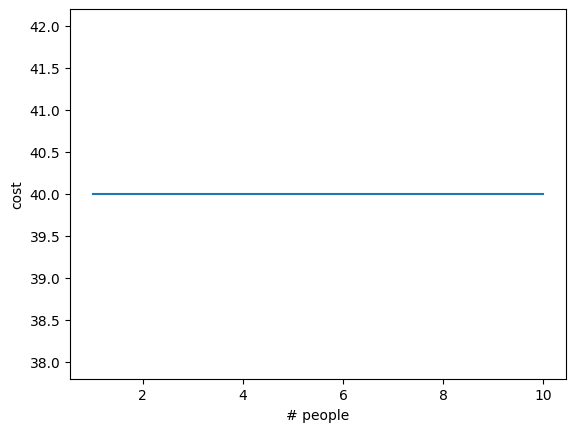

In [55]:
ax = plt.gca()
ax.plot(people, total_cost)
ax.set_xlabel('# people')
ax.set_ylabel('cost');

In [56]:
total_cost = 80.0 * people + 40.0
pd.DataFrame({'total_cost':total_cost}, 
             index=people)

,total_cost
1,120.0
2,200.0
3,280.0
4,360.0
5,440.0
6,520.0
7,600.0
8,680.0
9,760.0
10,840.0


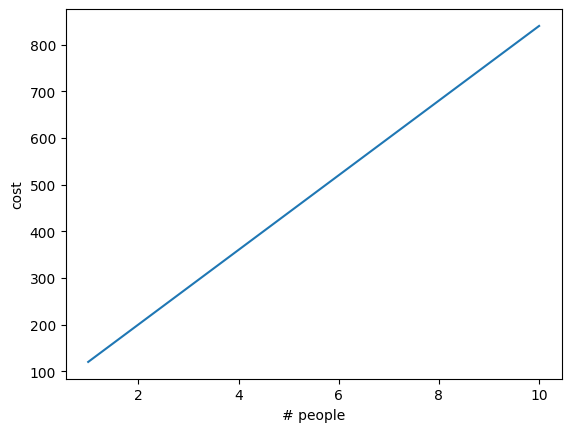

In [57]:
ax = plt.gca()
ax.plot(people, total_cost)
ax.set_xlabel('# people')
ax.set_ylabel('cost');

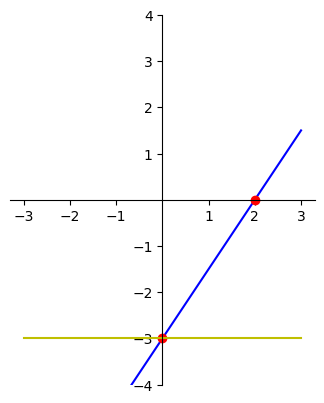

In [58]:
from mlwpy_video_extras import high_school_style

# y = mx + b .... basic form of a line
m,b = 1.5, -3

xs = np.linspace(-3, 3, 100)
ys = m * xs + b

ax = plt.gca()
ax.plot(xs, ys, 'b')

ax.plot(0, -3, 'ro')
ax.plot(2, 0 , 'ro')

ys=0*xs+b  #horizontal line:  y = 0x +b .... m=0
ax.plot(xs, ys, 'y')
ax.set_ylim(-4, 4)
high_school_style(ax)

In [59]:
xs    = np.linspace(-3, 3, 100)
xs_p1 = np.c_[xs, np.ones_like(xs)]
pd.DataFrame(xs_p1).head()

,0,1
0,-3.000000,1.0
1,-2.939394,1.0
2,-2.878788,1.0
3,-2.818182,1.0
4,-2.757576,1.0


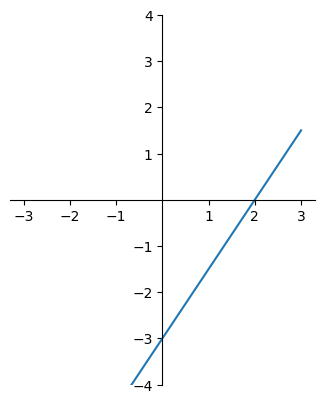

In [60]:
# m, b:  wgts
wgts = np.array([1.5, -3])
ys   = np.dot(xs_p1, wgts)

ax=plt.gca()
ax.plot(xs, ys)
ax.set_ylim(-4, 4)
high_school_style(ax)

## Multiple Dimensions

In [61]:
number_people = np.arange(1,11)
number_rbs    = np.arange(0,20)

number_people, number_rbs = np.meshgrid(number_people,
                                        number_rbs)
total_cost = (80 * number_people) + (10 * number_rbs) + 40

(0.0, 1.0, 0.0, 1.0)

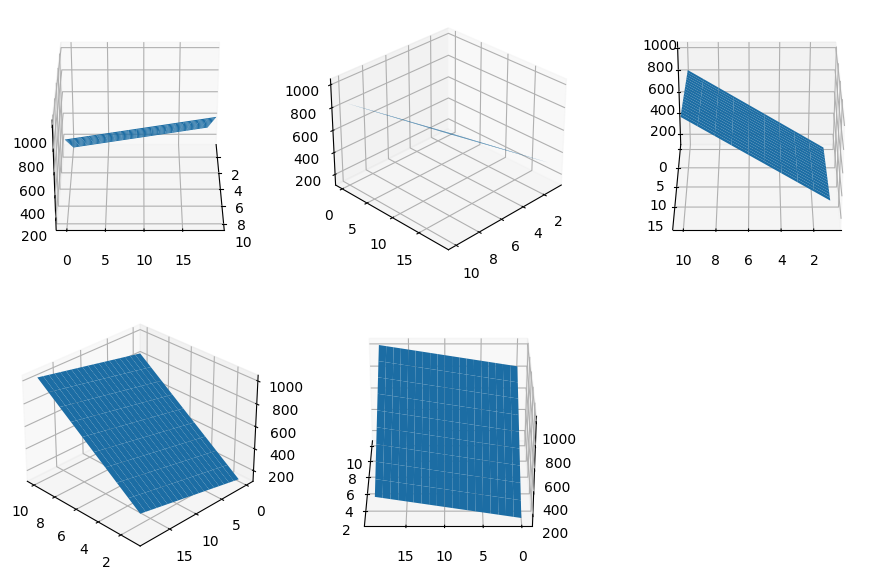

In [63]:
from mpl_toolkits.mplot3d import Axes3D
fig, axes = plt.subplots(2,3,
                         subplot_kw={'projection':'3d'},
                         figsize=(9,6),
                         tight_layout=True)
angles = [0, 45, 90, 135, 180]
for ax, angle in zip(axes.flat, angles):
    ax.plot_surface(number_people, number_rbs, total_cost)
    ax.azim = angle
axes.flat[-1].axis('off')

In [64]:
number_people  = np.array([2,3])
number_rbs     = np.array([0,1,2])
number_hotdogs = np.array([2,4])

costs = np.array([80, 10, 5])

In [65]:
columns = ['People', 'Rootbeers', 'HogDogs', 'TotalCost']

In [66]:
from mlwpy_video_extras import easy_combo

In [67]:
counts = easy_combo(number_people,
                    number_rbs,
                    number_hotdogs)

In [68]:
totals = (costs[0] * counts[:,0] +
          costs[1] * counts[:,1] +
          costs[2] * counts[:,2]) + 40
pd.DataFrame(np.c_[counts, totals], columns=columns).head()

,People,Rootbeers,HogDogs,TotalCost
0,2,0,2,210
1,2,0,4,220
2,3,0,2,290
3,3,0,4,300
4,2,1,2,220


In [69]:
totals = np.dot(counts, costs) + 40
pd.DataFrame(np.c_[counts, totals], columns=columns).head()

,People,Rootbeers,HogDogs,TotalCost
0,2,0,2,210
1,2,0,4,220
2,3,0,2,290
3,3,0,4,300
4,2,1,2,220


## Curves

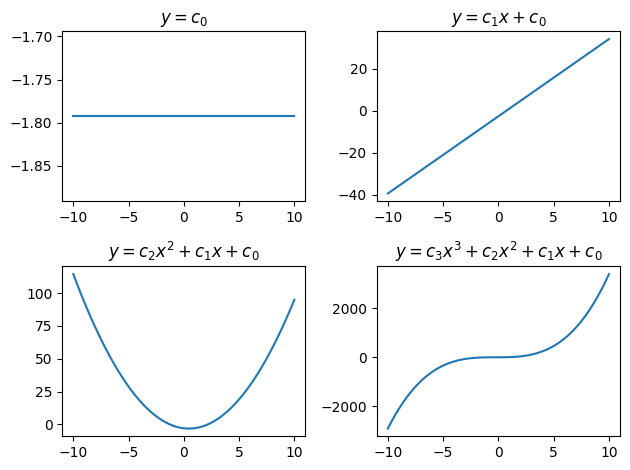

In [70]:
fig, axes = plt.subplots(2,2,tight_layout=True)

titles = ["$y=c_0$", 
          "$y=c_1x+c_0$",
          "$y=c_2x^2+c_1x+c_0$",
          "$y=c_3x^3+c_2x^2+c_1x+c_0$"]

xs = np.linspace(-10, 10, 100)
for power, (ax, title) in enumerate(zip(axes.flat, titles), 1):
    coeffs = np.random.uniform(-5, 5, power)
    poly = np.poly1d(coeffs)
    ax.plot(xs, poly(xs))
    ax.set_title(title)

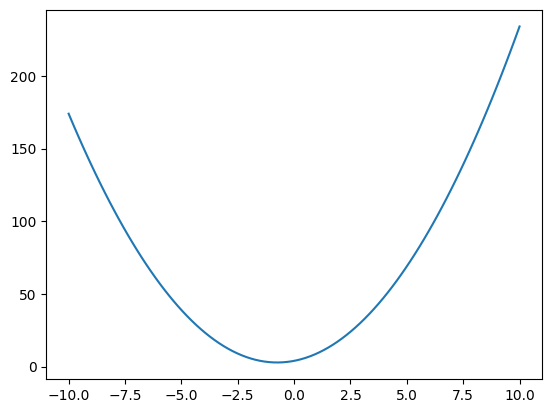

In [71]:
plt.Figure((2,1.5))
xs = np.linspace(-10, 10, 100)

coeffs = np.array([2,3,4])
ys = np.dot(coeffs, [xs**2, xs**1, xs**0])

plt.plot(xs, ys)

# When Maths meets Computers

In [60]:
# y = mx + b .. mx
# tgt = wD  ... target = weights times data

In [61]:
D = np.array([[1,3],
              [2,5],
              [2,7],
              [3,2]])
D

array([[1, 3],
       [2, 5],
       [2, 7],
       [3, 2]])

In [63]:
w = np.array([1.5, 2.5])
w

array([1.5, 2.5])

In [64]:
np.dot(D,w)  # Dw

array([ 9. , 15.5, 20.5,  9.5])

In [65]:
np.dot([1,3], w)

9.0

In [66]:
# wD  (more similar to mx)
try:
    np.dot(w,D)
except ValueError:
    print("BOOM.  :sadface:")

BOOM.  :sadface:


In [67]:
def rdot(arr, brr):
    return np.dot(brr, arr)
# turn wD ---> Dw  (which works)
rdot(w,D)
# y = mx 
# tgt = rdot(w,D)

array([ 9. , 15.5, 20.5,  9.5])

In [68]:
1.1 + 2.2 == 3.3

False

In [69]:
type(1.1), type(2.2), type(3.3), type(1.1 + 2.2)

(float, float, float, float)

In [70]:
# floats don't like to be compared with equality

In [71]:
# are the two values "very close" to one another
np.allclose(1.1 + 2.2, 3.3)

True